# Week 5 (Dimension Reduction, SVM)

## Dimension Reduction

### `make_regression`ÏùÑ Ïù¥Ïö©Ìïú PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learnÏóêÏÑúÎäî `make_regression` Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïó∞ÏäµÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ Ïàò ÏûàÎã§. Ïù¥Î•º Ïù¥Ïö©Ìï¥ÏÑú Principal Component RegressionÏùÑ Ïó∞ÏäµÌïòÎäî Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥Î≥¥Ïûê.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

### Q1 `make_regression` Ìï®ÏàòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï¥Î≥¥Ïûê

ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî X1Î∂ÄÌÑ∞ X10ÍπåÏßÄ, Ï¢ÖÏÜçÎ≥ÄÏàòÎäî YÎ•º ÏÉùÏÑ±ÌïòÏûê. ÌëúÎ≥∏ ÌÅ¨Í∏∞Îäî 1000ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥†, `noise`, `random_state`, `bias`Îì±Ïùò Î≥ÄÏàòÎäî ÏûêÏú†Î°≠Í≤å ÏÑ§Ï†ïÌï¥Î≥¥Ïûê.

In [4]:
# make_regressionÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

X, y, coef = make_regression(
    n_samples=1000,        # number of rows
    n_features=10,         # X1 ~ X10
    n_informative=5,       # truly relevant features
    noise=10.0,            # Gaussian noise level
    bias=3.0,              # intercept (bias term)
    coef=True,             # also return true coefficients
    random_state=42
)

# to DataFrame
feature_cols = [f"X{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_cols)
df["Y"] = y

print(df.shape)
print("True coefficients (length 10, others near 0 due to n_informative=5):")
print(coef)

(1000, 11)
True coefficients (length 10, others near 0 due to n_informative=5):
[58.28693612  0.          0.         32.12551734  7.18075454  0.
 10.30191944  0.          0.          9.42759779]


### Q2 EDAÎ•º Ìï¥Î≥¥Ïûê

Í∞Å Î≥ÄÏàòÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû®, scatterplot matrix, correlation matrix, ÏöîÏïΩÌÜµÍ≥ÑÎüâ(descriptive statistics)Î•º Í∑∏Î†§Î≥¥Ïûê


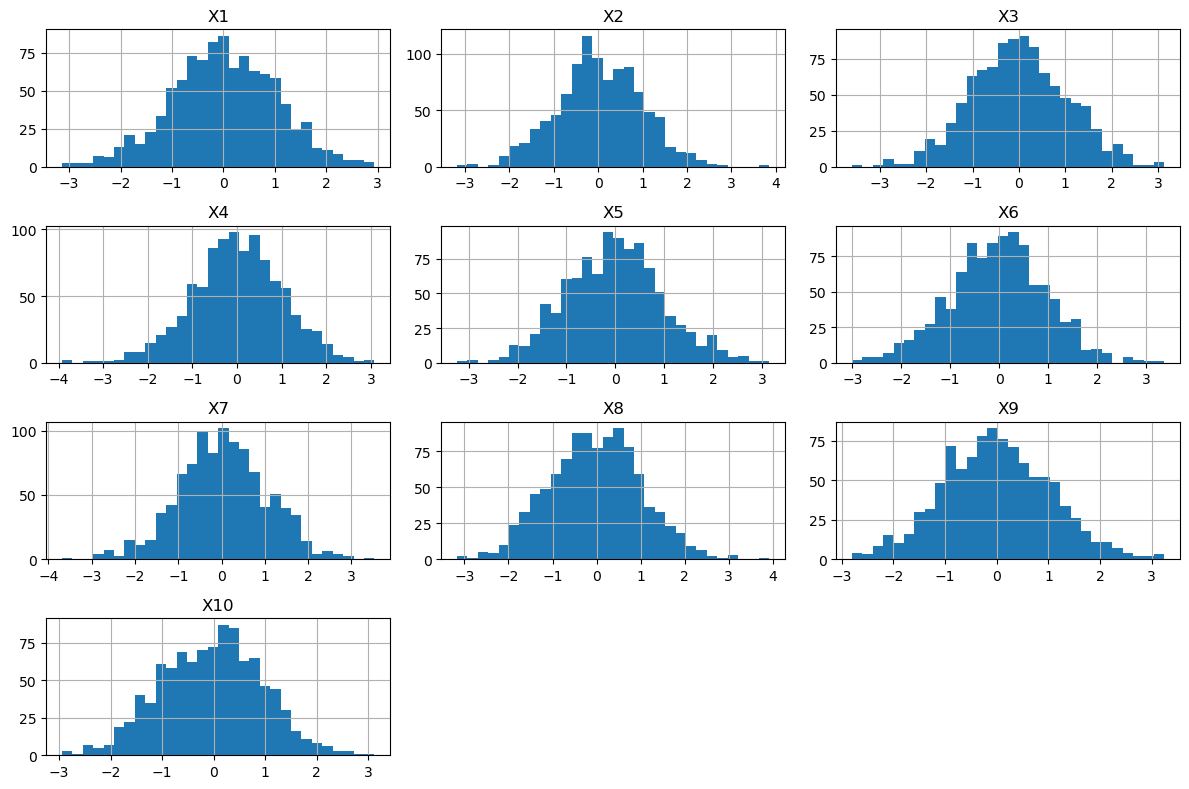

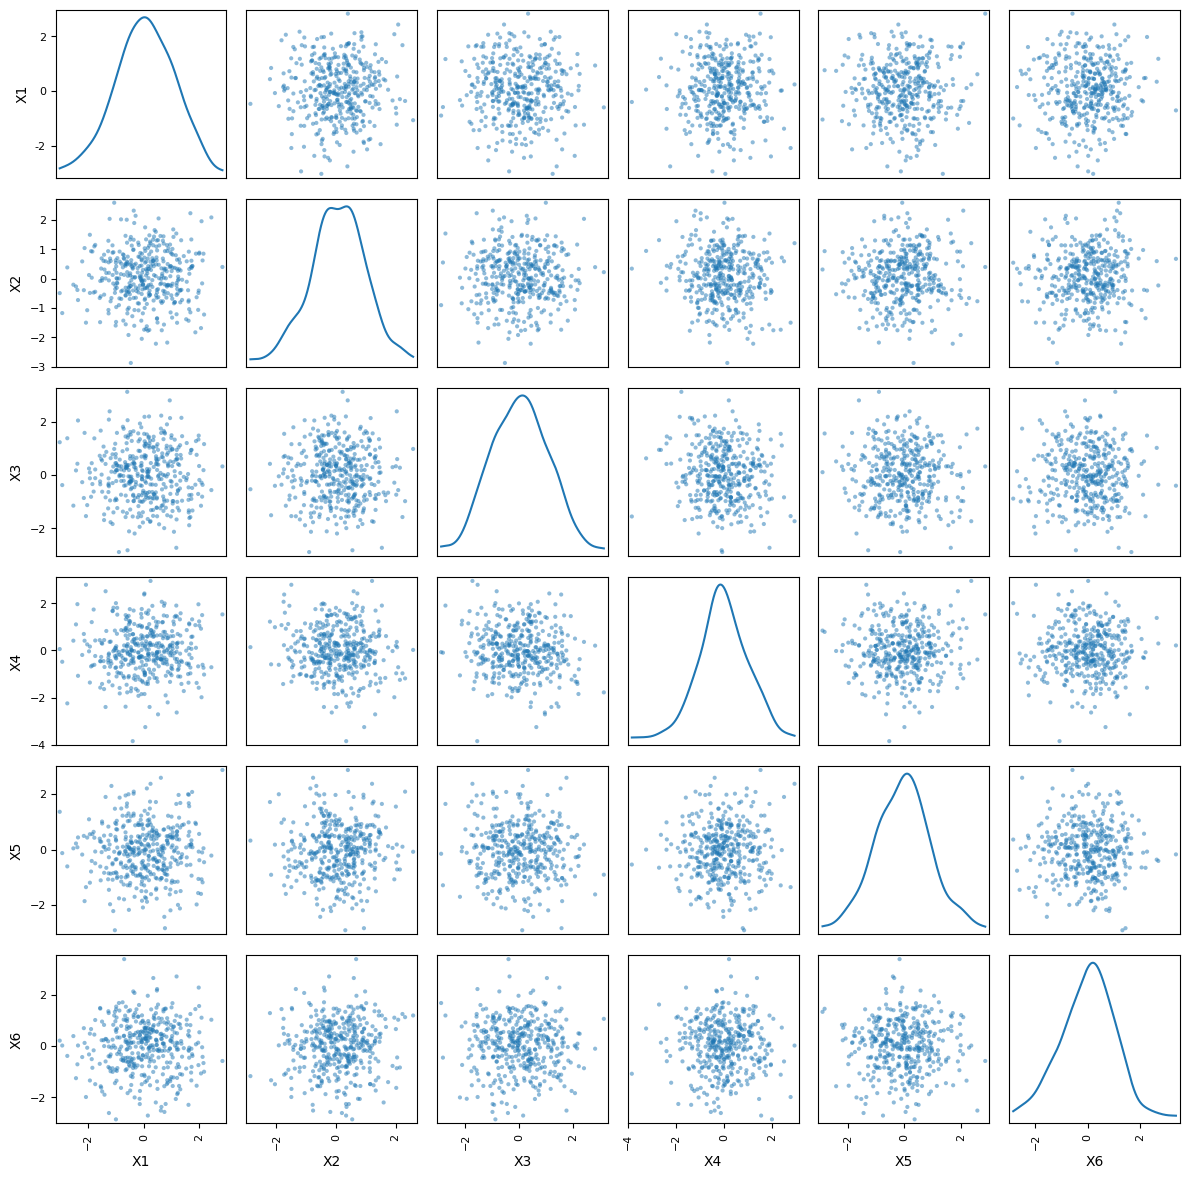

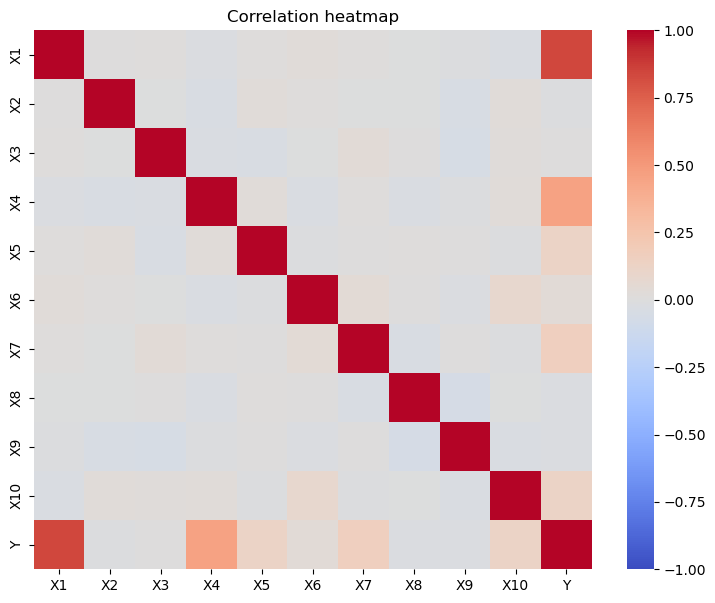

count      mean        std         min        25%       50%        75%  \
X1   1000.0  0.013622   1.012645   -3.138515  -0.651541 -0.012020   0.721896   
X2   1000.0  0.038105   0.945284   -3.176704  -0.559290  0.019097   0.687027   
X3   1000.0  0.005495   1.030962   -3.601085  -0.713176 -0.013284   0.696602   
X4   1000.0  0.010788   1.005433   -3.922400  -0.616527  0.014006   0.679698   
X5   1000.0 -0.022542   0.983366   -3.241267  -0.702626 -0.015036   0.613766   
X6   1000.0 -0.023104   0.986846   -3.007632  -0.650034 -0.003221   0.608861   
X7   1000.0  0.031292   1.016046   -3.688365  -0.631506  0.007605   0.685621   
X8   1000.0 -0.029252   1.037024   -3.170426  -0.749592 -0.012086   0.680087   
X9   1000.0 -0.002689   1.031230   -2.801912  -0.744779 -0.024976   0.683319   
X10  1000.0 -0.043075   0.983406   -2.943142  -0.750008 -0.001346   0.638310   
Y    1000.0  3.632572  69.882601 -294.093129 -45.238737  7.779788  52.434153   

            max  
X1     2.935658  
X2     3.852731  
X3     3.137749  
X4     3.076860  
X5     3.152057  
X6     3.377383  
X7     3.529055  
X8     3.926238  
X9     3.243093  
X10    3.117681  
Y    257.805312

In [5]:
# ÌûàÏä§ÌÜ†Í∑∏Îû®
import matplotlib.pyplot as plt

df[feature_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()
# Scatterplot matrix

from pandas.plotting import scatter_matrix

sample_df = df.sample(400, random_state=0)  # reduce clutter
_ = scatter_matrix(sample_df[feature_cols[:6]],  # first 6 features to keep it light
                   figsize=(12, 12), diagonal='kde')
plt.tight_layout()
plt.show()

# Correlation matrix

import seaborn as sns

corr = df[feature_cols + ["Y"]].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=False, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

# ÏöîÏïΩ ÌÜµÍ≥ÑÎüâ
desc = df[feature_cols + ["Y"]].describe().T
desc

### Q3 `StandardScaler` Î°ú scalingÏùÑ Ìï¥Î≥¥Ïûê

X Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ `StandarScaler`Î•º Ïù¥Ïö©ÌïòÏó¨ ÌëúÏ§ÄÌôîÎ•º Ìï¥Î≥¥Ïûê.
PCAÎ•º ÌïòÍ∏∞ Ï†ÑÏóê Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïúÎã§Îäî Ï†êÏùÑ Ïú†ÏùòÌïòÏûê.

In [6]:
from sklearn.preprocessing import StandardScaler

# Ïä§ÏºÄÏùºÎßÅÌïòÍ∏∞

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols].values)  # ndarray (n_samples, n_features)

# Keep as DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
X_scaled_df["Y"] = df["Y"].values

# Quick check: means ~0, stds ~1 (population std, ddof=0)
print("means:\n", X_scaled_df[feature_cols].mean().round(4))
print("stds :\n", X_scaled_df[feature_cols].std(ddof=0).round(4))

means:
 X1    -0.0
X2    -0.0
X3     0.0
X4     0.0
X5     0.0
X6    -0.0
X7     0.0
X8     0.0
X9    -0.0
X10   -0.0
dtype: float64
stds :
 X1     1.0
X2     1.0
X3     1.0
X4     1.0
X5     1.0
X6     1.0
X7     1.0
X8     1.0
X9     1.0
X10    1.0
dtype: float64


### Q4 `PCA`Î•º Ìï¥Î≥¥Ïûê

`PCA` Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ PCAÎ•º Ìï¥Î≥¥Ïûê. Îòê Îã§ÏùåÏùÑ Ìï¥Î≥¥Ïûê.

- PC1 Î∂ÄÌÑ∞ PC10 ÍπåÏßÄ Scree plotÏùÑ Í∑∏Î†§Î≥¥Ïûê
- PC1Í≥º PC2Î•º Í∞ÄÏßÄÍ≥† scatterplotÏùÑ Í∑∏Î†§Î≥¥Ïûê.

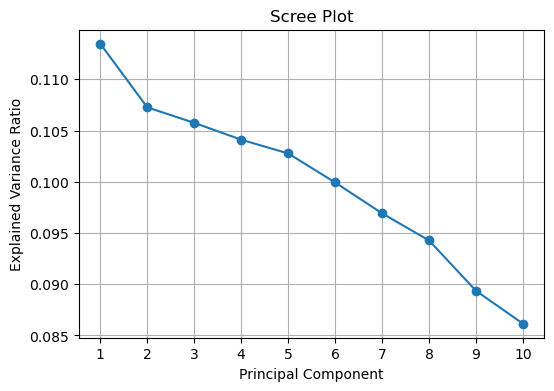

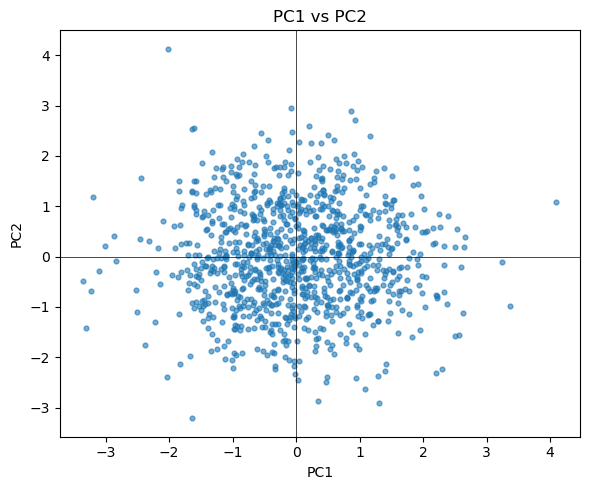

In [7]:
from sklearn.decomposition import PCA

# PCA Í≥ÑÏÇ∞ÌïòÍ∏∞
pca = PCA()
X_pcs = pca.fit_transform(X_scaled)   # scores (PC coordinates)

# Scree plot Í∑∏Î¶¨Í∏∞
evr = pca.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.plot(range(1, len(evr)+1), evr, marker="o")
plt.xticks(range(1, len(evr)+1))
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# PC1 ÏôÄ PC2 ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6,5))
plt.scatter(X_pcs[:, 0], X_pcs[:, 1], s=12, alpha=0.6)
plt.axhline(0, lw=0.5, c="k"); plt.axvline(0, lw=0.5, c="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")
plt.tight_layout()
plt.show()

### Q5 `train_test_split`ÏùÑ Ìï¥Î≥¥Ïûê

Train setÍ≥º Test setÏùÑ 6:4 ÎπÑÏú®Î°ú ÎÇòÎà†Î≥¥Ïûê

In [8]:
from sklearn.model_selection import train_test_split

# train setÍ≥º test set ÎÇòÎàÑÍ∏∞
X_train, X_test, y_train, y_test = train_test_split(
    X_pcs, df["Y"].values,
    test_size=0.4, random_state=42, shuffle=True
)

print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(600, 10) (400, 10) 600 400


###  Q6 Principal Component RegressionÏùÑ ÏßÑÌñâÌï¥Î≥¥Ïûê.

Q5ÏóêÏÑú ÎßåÎì† Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Îã§ÏùåÏùò Í≥ºÏ†ïÏúºÎ°ú Î¨∏Ï†úÎ•º ÌíÄÏñ¥Î≥¥Ïûê.
- YÎ•º Ï¢ÖÏÜçÎ≥ÄÏàò(`y_train`), `X_train`Ïùò PC1ÏùÑ Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÏó¨ Linear RegressionÏùÑ Ï†ÅÌï©ÌïúÎã§.
- `y_pred`Í≥º `y_train`ÏùÑ ÎπÑÍµêÌïòÏó¨ train errorÏùò MSEÎ•º Íµ¨ÌïúÎã§.
- Principal componentÏùÑ ÌïòÎÇò ÎäòÎ†§ Linear regressionÏùÑ Ï†ÅÌï©ÌïúÎã§. Ï¶â YÏóê ÎåÄÌï¥ PC1, PC2ÏúºÎ°ú Linear RegressionÏùÑ Ï†ÅÌï©ÌïúÎã§.
- ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú train errorÏùò MSEÎ•º Íµ¨ÌïúÎã§.
- PC10ÍπåÏßÄ Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïòÍ≥†, MSEÎ•º ÎπÑÍµêÌïúÎã§.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE Ï†ÄÏû•
max_k = min(10, X_train.shape[1])
mse_train = []
models = []

# ÌöåÍ∑ÄÎ™®Ìòï Ï†ÅÌï©

for k in range(1, max_k + 1):
    # use first k principal components
    Xtr_k = X_train[:, :k]
    reg = LinearRegression().fit(Xtr_k, y_train)
    y_pred_tr = reg.predict(Xtr_k)
    mse_k = mean_squared_error(y_train, y_pred_tr)
    mse_train.append(mse_k)
    models.append(reg)

print("Train MSE by k (PC1..PCk):")
for k, m in enumerate(mse_train, 1):
    print(f"k={k:2d} -> {m:.4f}")

Train MSE by k (PC1..PCk):
k= 1 -> 5171.0021
k= 2 -> 4946.2002
k= 3 -> 4945.4430
k= 4 -> 4397.3351
k= 5 -> 3143.9942
k= 6 -> 2133.3852
k= 7 -> 645.5928
k= 8 -> 613.7649
k= 9 -> 117.4551
k=10 -> 107.6325


### Q7 Test errorÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Ïûê.

ÏúÑ Í≥ºÏ†ïÏóêÏÑú Ï†ÅÌï©Ìïú Î™®ÌòïÏùÑ Î∞îÌÉïÏúºÎ°ú `y_test`ÏùÑ Ï∂îÏ†ïÌïòÍ≥† `y_test`ÏôÄÏùò MSEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ test errorÏùÑ Íµ¨Ìï¥Î≥¥Ïûê.

Test MSE by k:
k= 1 -> 4370.6131
k= 2 -> 4166.1342
k= 3 -> 4154.7466
k= 4 -> 3719.3885
k= 5 -> 2629.3040
k= 6 -> 1856.1787
k= 7 -> 623.7637
k= 8 -> 582.0797
k= 9 -> 85.4028
k=10 -> 80.7116


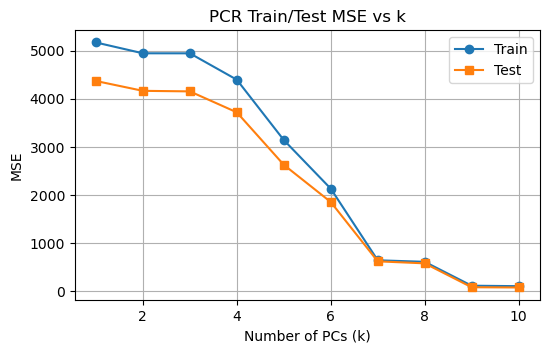

Best k on test = 10 (MSE=80.7116)


In [10]:
# test MSE Ï†ÄÏû•
mse_test = []

for k in range(1, max_k + 1):
    reg = LinearRegression().fit(X_train[:, :k], y_train)
    y_pred_te = reg.predict(X_test[:, :k])
    mse_k = mean_squared_error(y_test, y_pred_te)
    mse_test.append(mse_k)

print("Test MSE by k:")
for k, m in enumerate(mse_test, 1):
    print(f"k={k:2d} -> {m:.4f}")

# Compare train vs test
plt.figure(figsize=(6,3.5))
plt.plot(range(1, max_k+1), mse_train, marker='o', label="Train")
plt.plot(range(1, max_k+1), mse_test,  marker='s', label="Test")
plt.xlabel("Number of PCs (k)")
plt.ylabel("MSE")
plt.title("PCR Train/Test MSE vs k")
plt.legend()
plt.grid(True)
plt.show()

best_k = int(np.argmin(mse_test) + 1)
print(f"Best k on test = {best_k} (MSE={min(mse_test):.4f})")


## SVM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

### 1.1 Hard Margin Classifier

#### Q1.1 Hard Margin ClassifierÎûÄ? : 

Hard Margin ClassifierÎäî SVMÏùò Í∞ÄÏû• Îã®ÏàúÌïú ÌòïÌÉúÎ°ú, Îëê ÌÅ¥ÎûòÏä§Í∞Ä ÏôÑÎ≤ΩÌïòÍ≤å ÏßÅÏÑ†(ÌòπÏùÄ Ï¥àÌèâÎ©¥)ÏúºÎ°ú ÎÇòÎà†Ïßà Ïàò ÏûàÏùÑ Îïå ÏÇ¨Ïö©ÌïúÎã§. ÏâΩÍ≤å ÎßêÌï¥, Îëê Í∑∏Î£π ÏÇ¨Ïù¥Ïóê ‚ÄòÎèÑÎ°ú‚ÄôÎ•º Í∑∏Î¶¨Îêò, Í∑∏ ÎèÑÎ°úÎ•º Í∞ÄÎä•Ìïú Ìïú ÎÑìÍ≤å ÎßåÎì§Î©¥ÏÑúÎèÑ ÌïúÏ™Ω Í∑∏Î£πÏùò Ï†êÏù¥ ÎèÑÎ°ú ÏïàÏúºÎ°ú Îì§Ïñ¥Ïò§ÏßÄ ÏïäÎèÑÎ°ù ÌïòÎäî Î∞©ÏãùÏù¥Îã§.

Ïù¥Îïå Í≤ΩÍ≥ÑÏÑ†ÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï†êÎì§ÏùÑ **ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞(Support Vector)**ÎùºÍ≥† Î∂ÄÎ•¥Î©∞, Ïù¥ Ï†êÎì§ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎßàÏßÑ(ÎèÑÎ°ú Ìè≠)Ïù¥ Í≤∞Ï†ïÎêúÎã§. Hard Margin Î∞©ÏãùÏùÄ Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßàÏßÑ Î∞ñÏóê ÏûàÏñ¥Ïïº ÌïòÎØÄÎ°ú, Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°∞Í∏àÏù¥ÎùºÎèÑ ÏÑûÏù¥Í±∞ÎÇò ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÎßéÏúºÎ©¥ Ïûò ÏûëÎèôÌïòÏßÄ ÏïäÎäîÎã§Îäî ÌïúÍ≥ÑÍ∞Ä ÏûàÎã§. Ïù¥Îü∞ Í≤ΩÏö∞ÏóêÎäî Ïò§Ï∞®Î•º ÏùºÎ∂Ä ÌóàÏö©ÌïòÎäî Soft Margin Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [12]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

#### Q1.2 ÏúÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ 2Ï∞®ÏõêÏùò Ï¢åÌëúÌèâÎ©¥Ïóê ÏãúÍ∞ÅÌôîÌï¥Ï£ºÏÑ∏Ïöî.

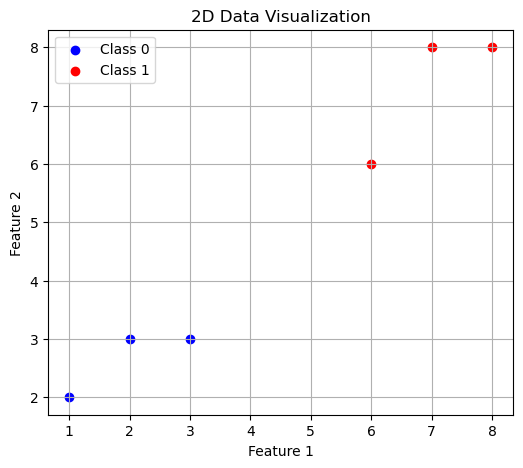

In [13]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Hard Margin SVM Î™®Îç∏ ÌïôÏäµ
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

#### Q1.3 ÌïòÎã® wÏôÄ bÎäî Î™®Îç∏ ÌïôÏäµÏúºÎ°ú Ï∞æÏïÑÎÇ∏ Wx+bÏùò Í≥ÑÏàòÏôÄ ÏÉÅÏàòÌï≠ÏûÖÎãàÎã§. wÏôÄ bÎ•º Ï†ïÏùòÌï¥Ï£ºÏÑ∏Ïöî.

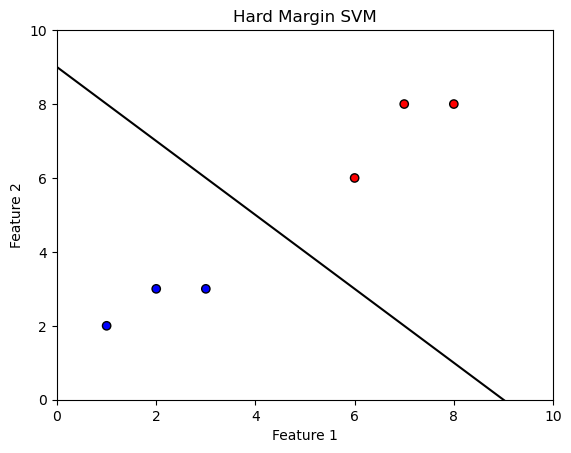

In [15]:
# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

### 1.2 Soft Margin Classifier

#### Q2.1 Soft Margin ClassifierÎûÄ?

Soft Margin ClassifierÎäî SVMÏù¥ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏôÑÎ≤ΩÌïòÍ≤å Î∂ÑÎ¶¨ÎêòÏßÄ ÏïäÎäî Í≤ΩÏö∞(ÎÖ∏Ïù¥Ï¶àÎÇò Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞)Ïóê ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏù¥Îã§. Hard MarginÏ≤òÎüº Î™®Îì† Ï†êÏùÑ ÎßàÏßÑ Î∞ñÏóê ÎëêÎäî ÎåÄÏã†, ÏùºÎ∂Ä Ï†êÏù¥ ÎßàÏßÑ ÏïàÏ™ΩÏóê Îì§Ïñ¥Ïò§Í±∞ÎÇò Ïã¨ÏßÄÏñ¥ ÏûòÎ™ª Î∂ÑÎ•òÎêòÎèÑÎ°ù ÌóàÏö©ÌïúÎã§.

Ïù¥Îïå ÌóàÏö©ÌïòÎäî Ï†ïÎèÑÎäî **Ìå®ÎÑêÌã∞ ÌååÎùºÎØ∏ÌÑ∞ 
ùê∂**Î°ú Ï°∞Ï†àÌïúÎã§. 
C Í∞íÏù¥ ÌÅ¨Î©¥ ÎßàÏßÑ Ïπ®Î≤îÏùÑ Í∞ïÌïòÍ≤å Î≤åÏ£ºÏñ¥ Hard MarginÏóê Í∞ÄÍπåÏõåÏßÄÍ≥†, 
C Í∞íÏù¥ ÏûëÏúºÎ©¥ ÎßàÏßÑ Ïπ®Î≤îÏùÑ Îçî ÎßéÏù¥ ÌóàÏö©ÌïòÏó¨ ÎßàÏßÑÏùÑ ÎÑìÌûàÎäî Ï™ΩÏùÑ ÌÉùÌïúÎã§.

ÏâΩÍ≤å ÎßêÌï¥, Soft MarginÏùÄ ‚ÄúÎèÑÎ°úÎ•º Ï°∞Í∏à Ï¢ÅÌûàÎçîÎùºÎèÑ ÏùºÎ∂Ä Ï∞®Îì§Ïù¥ ÎèÑÎ°ú ÏúÑÎ°ú ÏÇ¥Ïßù Ïò¨ÎùºÏò¨ Ïàò ÏûàÍ≤å ÌóàÎùΩÌïòÎäî‚Äù Î∞©ÏãùÏù¥Îã§. Ïù¥Î†áÍ≤å ÌïòÎ©¥ ÏïΩÍ∞ÑÏùò Îç∞Ïù¥ÌÑ∞ Í≤πÏπ®Ïù¥ÎÇò Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏñ¥ÎèÑ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÌïôÏäµÌï† Ïàò ÏûàÎã§.

#### Q2.2 Soft MarginÏùò Ï†ïÏùòÎ•º Îñ†Ïò¨Î¶¨Î©∞, ÎÖ∏Ïù¥Ï¶àÍ∞Ä Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî. (2Í∞ú Ïù¥ÏÉÅ Ï∂îÍ∞Ä ÏÉùÏÑ± ÌïÑÏöî)

In [17]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (ÏïΩÍ∞ÑÏùò ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [2.5, 5], [5.5, 4.5]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1])


In [18]:
# Soft Margin SVM Î™®Îç∏ ÌïôÏäµ
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

#### Q2.3 ÎßàÏßÑÏùÑ ÏÇ∞Ï∂úÌï¥ ÏãúÍ∞ÅÌôîÌïòÍ≥†, Support VectorÏùÑ Ï∞æÏïÑÏ£ºÏÑ∏Ïöî.

ÌïòÎã® Í∑∏Î¶ºÏùÄ ÏòàÏãúÎ°ú, Íº≠ ÎòëÍ∞ôÏù¥ Ï∂úÎ†•ÎêòÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§.

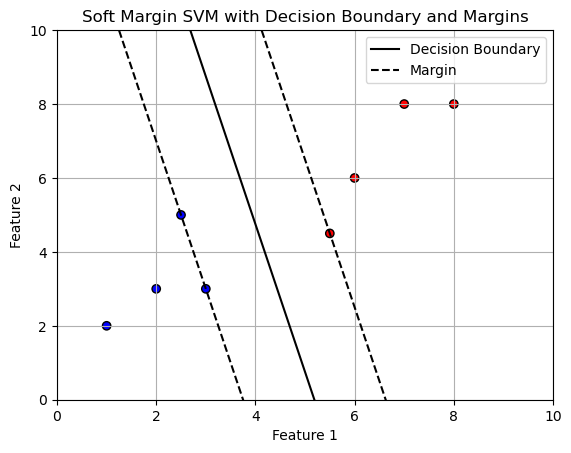

In [19]:
# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# ÎßàÏßÑ Í≤ΩÍ≥Ñ Í≥ÑÏÇ∞
margin = 1 / np.linalg.norm(w)
y_margin_positive = -(w[0] * x_plot + b - 1) / w[1]
y_margin_negative = -(w[0] * x_plot + b + 1) / w[1]

# ÎßàÏßÑ ÏãúÍ∞ÅÌôî
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 ÌîÑÎ°úÏ†ùÌä∏ (SVC)

In [20]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

#### **Linear SVC**

In [21]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [22]:
y_pred = clf.predict(X) # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ïû¨ÏòàÏ∏° (Ïã§ÏäµÏö©)
confusion_matrix(y, y_pred) # Îî∞ÎùºÏÑú, Î∂ÑÎ•ò Í≤∞Í≥ºÍ∞Ä ÏÉÅÎãπÌûà Ï†ïÌôïÌï† ÏàòÎ∞ñÏóê ÏóÜÏùåÏùÑ Í∞êÏïàÌï¥Ïïº Ìï®

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

#### Q3.1 ÏúÑ ÏòàÏãúÏ≤òÎüº, ÏòµÏÖòÏùÑ linearÎ°ú ÏÑ§Ï†ïÌï¥ÎèÑ ÎêòÏßÄÎßå, sklearnÏùò LinearSVC Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÎèÑ Íµ¨ÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. LinearSVCÎ°ú Ïû¨Íµ¨ÌòÑÌï¥Ï£ºÏÑ∏Ïöî.

In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# n_samples > n_features ÏÉÅÌô© ‚Üí primal ÌíÄÍ∏∞: dual=False Í∂åÏû•
lin_svc = make_pipeline(StandardScaler(),
                        LinearSVC(C=1.0, dual=False, random_state=0))
lin_svc.fit(X, y)

y_pred = lin_svc.predict(X)
print("Confusion Matrix (LinearSVC)\n", confusion_matrix(y, y_pred))
print("Accuracy:", round(accuracy_score(y, y_pred), 4))

Confusion Matrix (LinearSVC)
 [[49  1  0]
 [ 1 32 17]
 [ 0 11 39]]
Accuracy: 0.8


#### **Kernal SVC**

#### Q3.2 Kernel SCV - non-linearÌïú ÌòïÌÉúÏùò SVMÏùÑ ÌïòÎÇò Ïù¥ÏÉÅ Íµ¨ÌòÑÌï¥Ï£ºÏÑ∏Ïöî. ÎèôÏùºÌïòÍ≤å, ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º predictÌïòÏó¨ confusion matrixÎ•º Íµ¨Ìï¥Ï£ºÏÑ∏Ïöî.

In [27]:
# ---------- Kernel SVCs ----------
# 1) linear kernel (reference)
svc_linear = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))
svc_linear.fit(X, y)
cm_linear = confusion_matrix(y, svc_linear.predict(X))
acc_linear = accuracy_score(y, svc_linear.predict(X))
print("Confusion Matrix (SVC linear)\n", cm_linear)
print("Accuracy (linear):", round(acc_linear, 4))

# 2) RBF kernel (non-linear)
svc_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", random_state=0))
svc_rbf.fit(X, y)
cm_rbf = confusion_matrix(y, svc_rbf.predict(X))
acc_rbf = accuracy_score(y, svc_rbf.predict(X))
print("\nConfusion Matrix (SVC RBF)\n", cm_rbf)
print("Accuracy (RBF):", round(acc_rbf, 4))

# 3) Polynomial kernel (degree=3) ‚Äî optional another non-linear model
svc_poly3 = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=1.0, gamma="scale", coef0=1.0))
svc_poly3.fit(X, y)
cm_poly = confusion_matrix(y, svc_poly3.predict(X))
acc_poly = accuracy_score(y, svc_poly3.predict(X))
print("\nConfusion Matrix (SVC poly deg=3)\n", cm_poly)
print("Accuracy (poly deg=3):", round(acc_poly, 4))

Confusion Matrix (SVC linear)
 [[49  1  0]
 [ 0 38 12]
 [ 0 15 35]]
Accuracy (linear): 0.8133

Confusion Matrix (SVC RBF)
 [[49  1  0]
 [ 0 36 14]
 [ 0 12 38]]
Accuracy (RBF): 0.82

Confusion Matrix (SVC poly deg=3)
 [[50  0  0]
 [ 0 37 13]
 [ 0 13 37]]
Accuracy (poly deg=3): 0.8267


#### ÏãúÍ∞ÅÌôî

#### Q3.3 ÏïÑÎûò ÏòàÏãú plotÏ≤òÎüº, linear modelÍ≥º non-linear Î™®Îç∏Ïùò ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


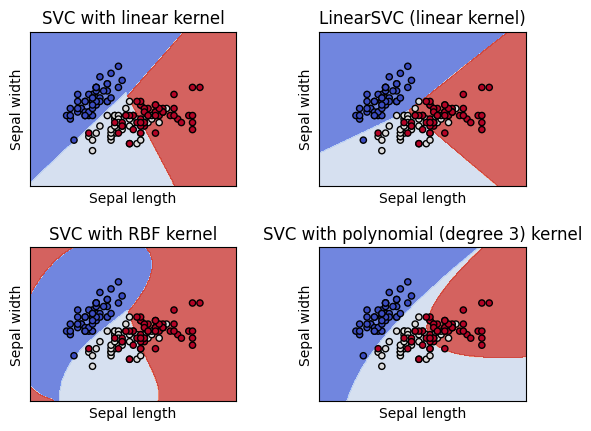

In [ ]:
plt.show()

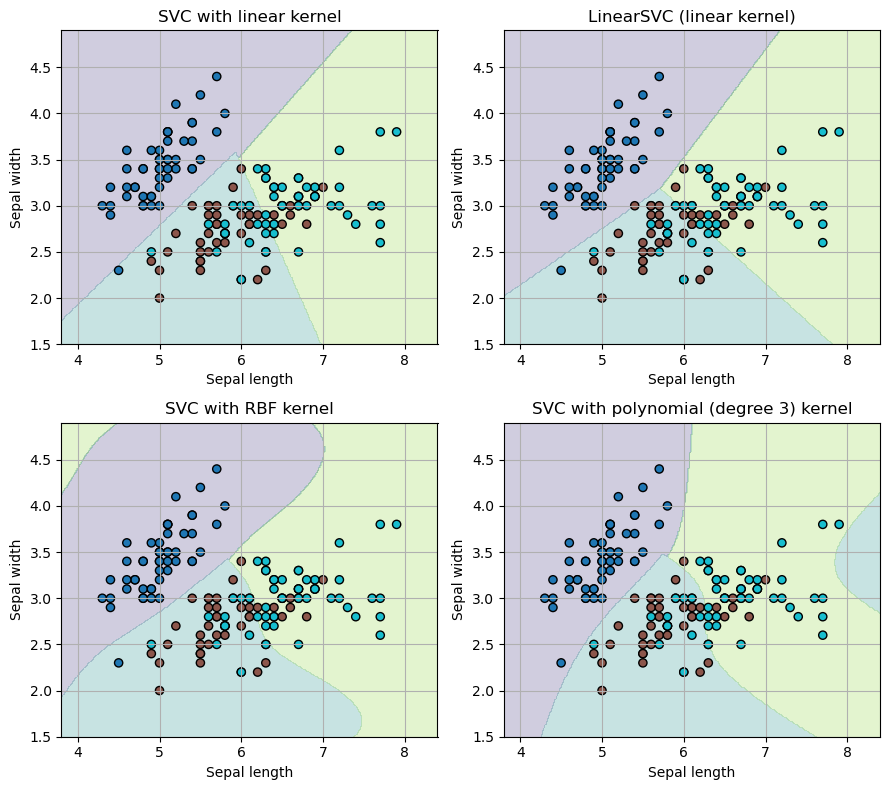

In [28]:
# Î™®Îç∏ Ï†ïÏùò
svc_linear = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))
lin_svc     = make_pipeline(StandardScaler(), LinearSVC(C=1.0, dual=False, random_state=0))
svc_rbf     = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale"))
svc_poly3   = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=1.0, gamma="scale", coef0=1.0))

# Î™®Îç∏ ÌïôÏäµ
svc_linear.fit(X, y)
lin_svc.fit(X, y)
svc_rbf.fit(X, y)
svc_poly3.fit(X, y)

# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_decision(ax, model, X, y, title):
    x0, x1 = X[:, 0], X[:, 1]
    x_min, x_max = x0.min() - 0.5, x0.max() + 0.5
    y_min, y_max = x1.min() - 0.5, x1.max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.25, levels=np.arange(y.max()+2)-0.5)
    ax.scatter(x0, x1, c=y, edgecolors="k", cmap="tab10", s=35)
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_title(title)
    ax.grid(True)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(9, 8))
plot_decision(axes[0, 0], svc_linear, X, y, "SVC with linear kernel")
plot_decision(axes[0, 1], lin_svc,     X, y, "LinearSVC (linear kernel)")
plot_decision(axes[1, 0], svc_rbf,     X, y, "SVC with RBF kernel")
plot_decision(axes[1, 1], svc_poly3,   X, y, "SVC with polynomial (degree 3) kernel")
plt.tight_layout()
plt.show()